In [1]:
import numpy as np #for arrays
import pandas as pd#gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

file_path = '/content/drive/MyDrive/MA_Thesis/DBCommunity/saved_data/test_reliability.xlsx'

df = pd.read_excel(file_path)

df

,Title,Post_ID,Text,Author,Author_ID,Reply,LastReply,PublishTime,Like,Collect,...,Out_Betweenness,Reply_Bin,Feminism,Research_Advice,Emotional,code_sentiment_label,code_category,code_feminism,code_research,code_emotional
0,如何在导师布置的工作与个人学习之间找到平衡？,1634,大家好，我是去年保研直博，现在本科大四还没毕业，保研结束的时候很感激很开心自己找到了一个好导...,Anna,1039,4,2022-05-18,2022-05-15,0,3,...,0.000000,0,0,1,1,1,0,0,1,1
1,（主动）退学经历会影响之后找教职吗,2686,想问下uu们，之前有一段国内读研经历但因为国外的master申phd比较好申，申请到mast...,momo,7,12,2021-08-31,2021-06-15,0,0,...,0.000262,0,0,1,1,1,0,0,1,1
2,美国文科PhD申请关于语言成绩无法按时提交的问题,1031,正在准备申请美国文科PhD，大部分学校提交材料的deadline是12.1。因为我之前一直看...,七月刍狗,708,22,2022-11-27,2022-11-09,4,3,...,0.000000,1,0,1,1,1,0,0,1,1
3,请问一下日本读研可以回国读博吗,4266,本科双非一本，硕士日本国立大学读教育学方向，想回国读博，但是看了国内对博士要求很高，请问一下...,闲人不要懒,2423,4,2020-10-06,2020-10-04,0,0,...,0.000000,0,0,1,0,0,0,1,1,1
4,教授不回复我的reference request邮件,2688,如题，本人海外本科物理系的，之前在这个教授实验室里搬砖了一年。先是暑假做暑研，然后又上了他的...,东北大帝,1155,18,2021-08-31,2021-08-30,6,3,...,0.000000,0,0,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,读博是兴趣重要还是方法重要？985法学及新闻学教授的不同看法,183,姐妹们好！我是法本法硕，毕业后做了非诉律师，总觉得自己做的事情很没意思也没意义，所以一直在考...,恩加一,145,0,2023-11-08,2023-11-08,8,0,...,0.000000,0,0,1,1,1,0,0,1,1
96,想出国读phd，研二是留在本校做实验还是去联培,210,现在刚研二，目前的导是实验方向，但是有点重男轻女，觉得男生更适合做实验。师兄说导师挺支持我们...,千岁千岁千千岁,161,4,2023-10-25,2023-09-14,1,0,...,0.000000,0,0,1,0,1,0,0,1,0
97,想问组里bioinformatics及computational biology方向的小伙伴...,3861,自我介绍一下，985本硕药学，硕士一直想做生信相关课题，进了学院里做类似方向的课题组，进组后...,玄小西,2208,8,2020-11-20,2020-11-15,1,5,...,0.000000,0,0,1,0,1,0,0,1,0
98,北美material science硕士/刚拿到好多offer！申请有关的问题...,2007,本科是一个挺不错的211+UWaterloo合作双学位，硕士申请相同专业申请季拿到了8+硕士...,無双制御,1249,0,2022-02-28,2022-02-28,0,0,...,0.000000,0,0,1,0,1,1,0,1,0


In [4]:
df.columns

Index(['Title', 'Post_ID', 'Text', 'Author', 'Author_ID', 'Reply', 'LastReply',
       'PublishTime', 'Like', 'Collect', 'Repost', 'Length', 'sentiment_label',
       'sentiment_score', 'Category', 'PostCount', 'ReplyCount',
       'male_excluded', 'In_Replies', 'Out_Replies', 'In_Betweenness',
       'Out_Betweenness', 'Reply_Bin', 'Feminism', 'Research_Advice',
       'Emotional', 'code_sentiment_label', 'code_category', 'code_feminism',
       'code_research', 'code_emotional'],
      dtype='object')

Evaluating: sentiment_label vs code_sentiment_label
Confusion Matrix:
[[24  1]
 [ 2 73]]


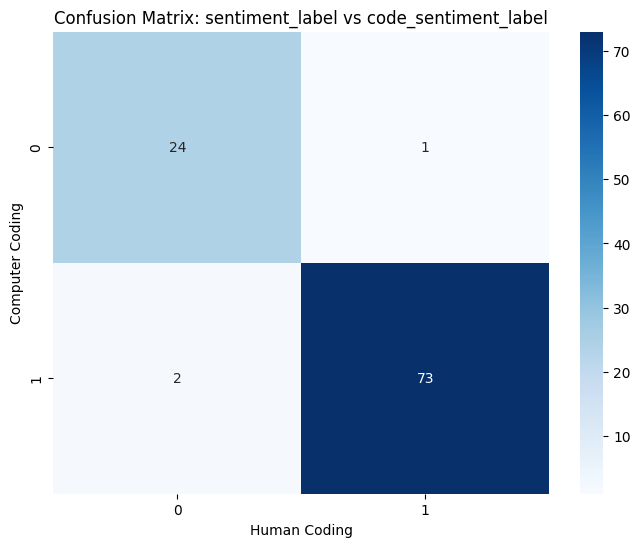


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.99      0.97      0.98        75

    accuracy                           0.97       100
   macro avg       0.95      0.97      0.96       100
weighted avg       0.97      0.97      0.97       100

Cohen's Kappa: 0.9210526315789473
--------------------------------------------------
Evaluating: Category vs code_category
Confusion Matrix:
[[86  3]
 [ 0 11]]


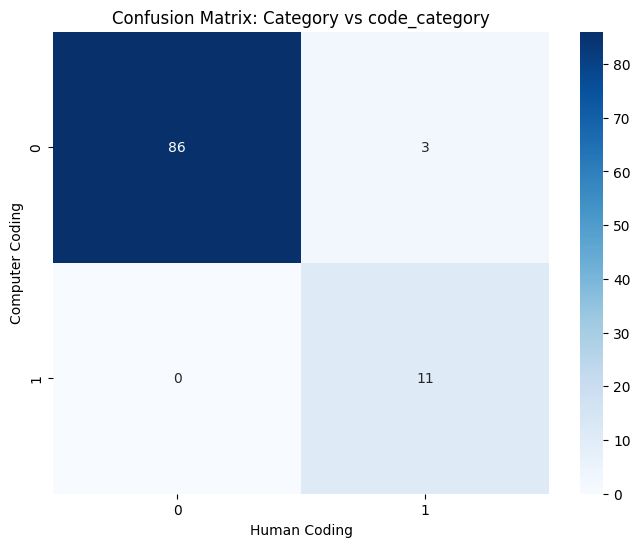


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        89
           1       0.79      1.00      0.88        11

    accuracy                           0.97       100
   macro avg       0.89      0.98      0.93       100
weighted avg       0.98      0.97      0.97       100

Cohen's Kappa: 0.8631386861313869
--------------------------------------------------
Evaluating: Feminism vs code_feminism
Confusion Matrix:
[[90  3]
 [ 0  7]]


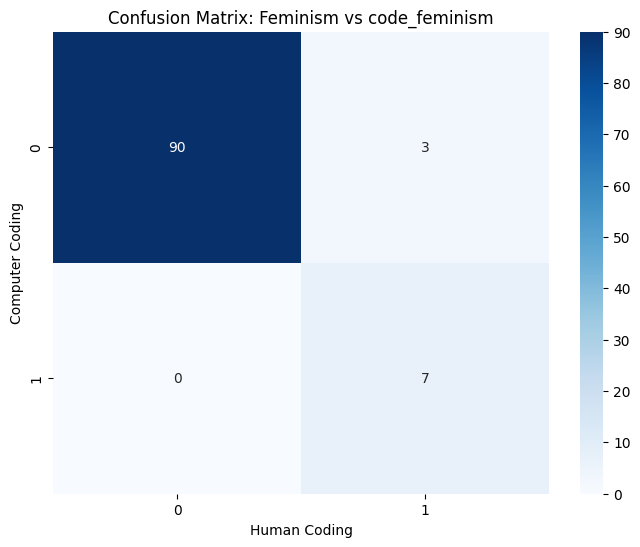


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        93
           1       0.70      1.00      0.82         7

    accuracy                           0.97       100
   macro avg       0.85      0.98      0.90       100
weighted avg       0.98      0.97      0.97       100

Cohen's Kappa: 0.8076923076923077
--------------------------------------------------
Evaluating: Research_Advice vs code_research
Confusion Matrix:
[[15  1]
 [ 2 82]]


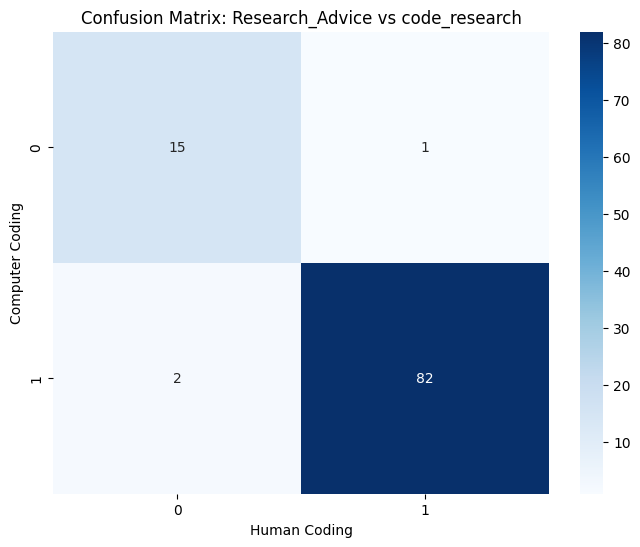


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.99      0.98      0.98        84

    accuracy                           0.97       100
   macro avg       0.94      0.96      0.95       100
weighted avg       0.97      0.97      0.97       100

Cohen's Kappa: 0.8911465892597968
--------------------------------------------------
Evaluating: Emotional vs code_emotional
Confusion Matrix:
[[58  2]
 [ 1 39]]


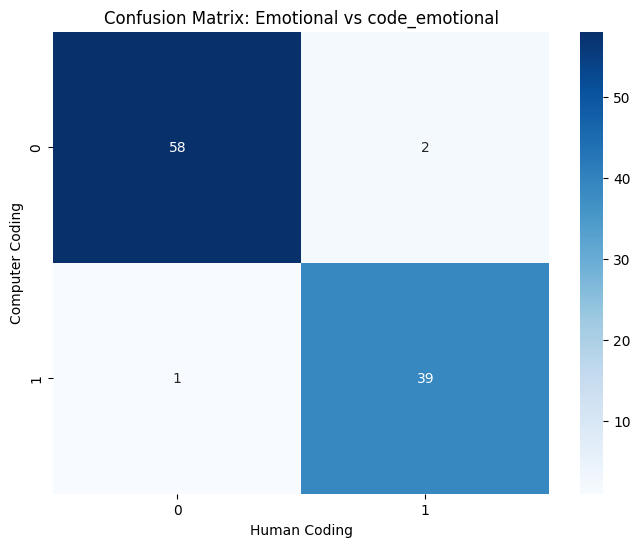


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        60
           1       0.95      0.97      0.96        40

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

Cohen's Kappa: 0.9377593360995851
--------------------------------------------------


In [5]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_coding(df, computer_col, human_col):
    """
    Evaluate the agreement between computer coding and human coding for a given pair of columns.
    """
    print(f"Evaluating: {computer_col} vs {human_col}")

    # Determine all unique labels across both coding columns
    labels = sorted(list(set(df[computer_col].unique()).union(set(df[human_col].unique()))))

    # Compute confusion matrix
    cm = confusion_matrix(df[computer_col], df[human_col], labels=labels)
    print("Confusion Matrix:")
    print(cm)

    # Plot the confusion matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Human Coding')
    plt.ylabel('Computer Coding')
    plt.title(f'Confusion Matrix: {computer_col} vs {human_col}')
    plt.show()

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(df[computer_col], df[human_col], labels=labels))

    # Calculate Cohen's Kappa for interrater reliability
    kappa = cohen_kappa_score(df[computer_col], df[human_col])
    print("Cohen's Kappa:", kappa)
    print("-" * 50)

# Evaluate all pairs of coding columns
evaluate_coding(df, 'sentiment_label', 'code_sentiment_label')
evaluate_coding(df, 'Category', 'code_category')
evaluate_coding(df, 'Feminism', 'code_feminism')
evaluate_coding(df, 'Research_Advice', 'code_research')
evaluate_coding(df, 'Emotional', 'code_emotional')


            Aspect  Cohen's Kappa
0        Sentiment       0.921053
1         Category       0.863139
2         Feminism       0.807692
3  Research Advice       0.891147
4        Emotional       0.937759


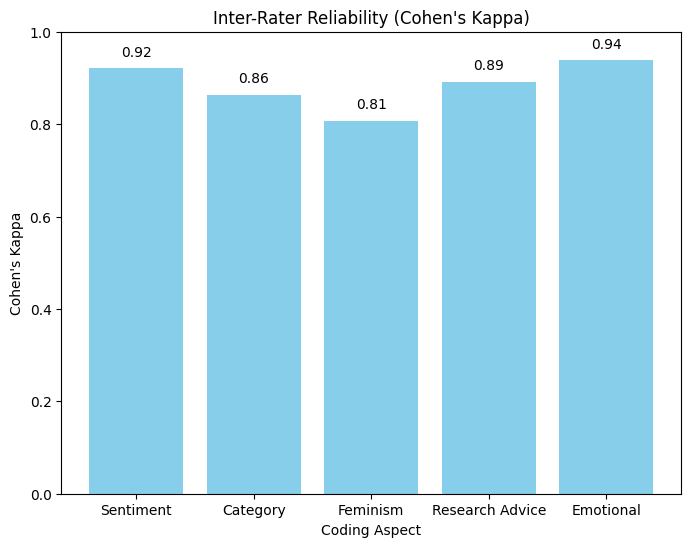

In [6]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt

# Define pairs of computer and human coding columns
column_pairs = {
    'Sentiment': ('sentiment_label', 'code_sentiment_label'),
    'Category': ('Category', 'code_category'),
    'Feminism': ('Feminism', 'code_feminism'),
    'Research Advice': ('Research_Advice', 'code_research'),
    'Emotional': ('Emotional', 'code_emotional')
}

# Calculate Cohen's kappa for each pair
kappa_values = {}
for aspect, (comp, human) in column_pairs.items():
    kappa = cohen_kappa_score(df[comp], df[human])
    kappa_values[aspect] = kappa

# Create a DataFrame to display the kappa values in a table format
kappa_df = pd.DataFrame(list(kappa_values.items()), columns=['Aspect', "Cohen's Kappa"])
print(kappa_df)

# Plot the Cohen's kappa values in a bar chart
plt.figure(figsize=(8,6))
bars = plt.bar(kappa_df['Aspect'], kappa_df["Cohen's Kappa"], color='skyblue')
plt.xlabel("Coding Aspect")
plt.ylabel("Cohen's Kappa")
plt.title("Inter-Rater Reliability (Cohen's Kappa)")
plt.ylim(0, 1)

# Annotate bars with the kappa values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f"{height:.2f}", ha='center', va='bottom')

plt.show()
